<a href="https://colab.research.google.com/github/Ranjankraj/Shala/blob/main/ML_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv as csv
%matplotlib inline

In [ ]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [ ]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [ ]:
attrition_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


In [ ]:
attrition_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

In [ ]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

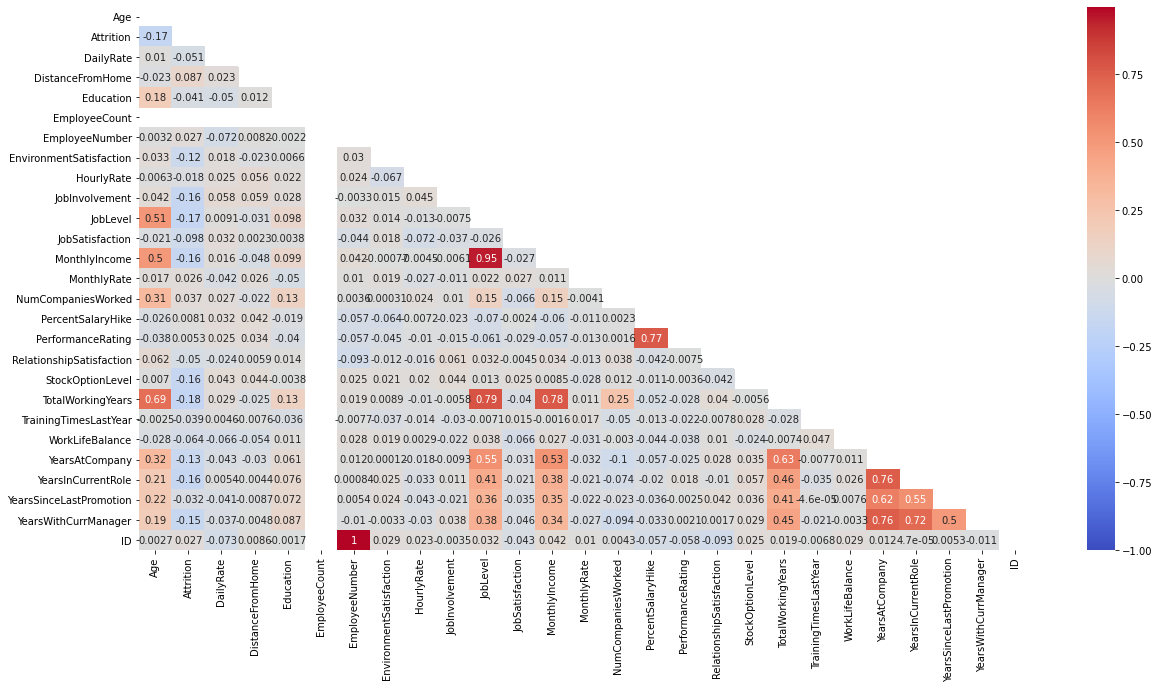

In [ ]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(attrition_data.corr(), vmin = -1, cmap='coolwarm', annot=True, mask=mask)

In [ ]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField','Gender', 
                       'JobRole','MaritalStatus', 'OverTime']
numerical_columns = ['Age', 'DailyRate','DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                     'HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction',
                     'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                     'PercentSalaryHike', 'PerformanceRating',
                     'RelationshipSatisfaction', 'StockOptionLevel',
                     'TotalWorkingYears','TrainingTimesLastYear', 
                     'WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole',
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']#,'ID','EmployeeCount','EmployeeNumber' are to be dropped
outputs = ['Attrition']

# Dropping the irrelevant columns
attrition_data.drop(['ID', 'EmployeeCount', 'EmployeeNumber'], axis=1)
train = attrition_data

In [ ]:
# converting the categorical and the numerical training data into tensors
for category in categorical_columns:
    train[category] = train[category].astype('category')


BusinessTravel = train.BusinessTravel.cat.codes.values
Department = train.Department.cat.codes.values
EducationField = train.EducationField.cat.codes.values
Gender = train.Gender.cat.codes.values
JobRole = train.JobRole.cat.codes.values
MaritalStatus = train.MaritalStatus.cat.codes.values
OverTime = train.OverTime.cat.codes.values 

categorical_data = np.stack([BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime], 1)

# convert the categorical data into a tensor
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
# categorical_data

#implementing one-hot encoding increases the accuracy
categorical_data = torch.nn.functional.one_hot(categorical_data)
# categorical_data

print("Type of categorical data \n {}".format(type(categorical_data)))
print("Shape of categorical data \n {}". format(categorical_data.shape))
print("Sample of categorical data after converting to tensor \n {}".format(categorical_data[:5]))


numerical_data = np.stack([train[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.int64)
print("-*"*30)
print("Type of numerical data \n {}".format(type(numerical_data)))
print("Shape of the numerical data \n {}".format(numerical_data.shape))
print("Sample of the numerical data after converting to tensor\n {}".format(numerical_data[:2]))


# np.resize(attrition_data['Attrition'],(1028,1)) #= np.array(attrition_data['Attrition'])
outputs = torch.tensor(attrition_data['Attrition'].values)
print('-*'*30)
print('output type :{}'.format(type(outputs)))
print('output shape :{}'.format(outputs.shape))
print(outputs[:5])

Type of categorical data 
 <class 'torch.Tensor'>
Shape of categorical data 
 torch.Size([1028, 7, 9])
Sample of categorical data after converting to tensor 
 tensor([[[0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 1, 0, 0, 0, 0, 0, 0, 0],

In [73]:
# concatenate the numerical and the catigorical data in one tensor to form the final data set
data = torch.cat([categorical_data,  numerical_data], dim=1)
#data = np.array(data)
x = data.numpy()
print('type of the data{}'.format(type(x)))
print('size of the data{}'.format(x.shape))
y = outputs.numpy()
print('type of the output{}'.format(type(y)))
print('size of the output{}'.format(y.shape))

RuntimeError: ignored